In [1]:
import tensorflow as tf

tf.__version__

'2.8.0'

In [2]:
import os
os.getcwd() # getcwd : 

'/content'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [4]:
# seed 설정
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,          # rescale : 이미지 크기 변경 (1./255 : 0~255 >> 0~1)  
                                   horizontal_flip=True,    # 수평 대칭 이미지(수평 뒤집기)를 50% 확률로 만들어 추가
                                   width_shift_range=0.1,   # 전체크기 0.1(10%) 범위에서 좌우 이동(수평이동)
                                   height_shift_range=0.1,  # 전체크기 0.1(10%) 범위에서 상하 이동(수직이동)
                                   #rotation_range=5,        # 정해진 각도만큼 이미지 회전
                                   #shear_range=0.7,         # 좌표 하나 고정, 다른 n개 좌표 이동변환
                                   #zoom_range=[0.9,2.2],    # 범위 축소/확대
                                   #vertical_flip=True,      # 수직 대칭 이미지(수직으로 이미지 뒤엎기)
                                   fill_mode='nearest')     # 이미지 변환시 생기는 빈공간 채우기(nearest : 가장 비슷한 색으로)

In [6]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/02_DeepLearning/dataset/augmentation/train',
                                                    target_size=(150,150),
                                                    batch_size=5, 
                                                    class_mode='binary')  # 이진 분류(치매/정상)

Found 160 images belonging to 2 classes.


In [7]:
# 테스트 셋( 이미지 부풀리지 않기, 정규화만 해주기)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/02_DeepLearning/dataset/augmentation/test',
                                                    target_size=(150,150),
                                                    batch_size=5, 
                                                    class_mode='binary')  # 이진 분류(치매/정상)

Found 120 images belonging to 2 classes.


In [8]:
# 모델링 (CNN)
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())      # 차원 축소 (2차원>>1차원)
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [9]:
# 모델 컴파일(실행환경 설정)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002), 
              metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,
                    steps_per_epoch=30,
                    epochs=20,
                    validation_data=test_generator,
                    validation_steps=4)

Epoch 1/20
30/30 [==============================] - 4s 60ms/step - loss: 0.6984 - accuracy: 0.4867 - val_loss: 0.6956 - val_accuracy: 0.4000
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6911 - accuracy: 0.5533 - val_loss: 0.6692 - val_accuracy: 0.7500
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6905 - accuracy: 0.4867 - val_loss: 0.6721 - val_accuracy: 0.5000
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6757 - accuracy: 0.6000 - val_loss: 0.6632 - val_accuracy: 0.5500
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6515 - accuracy: 0.6333 - val_loss: 0.5607 - val_accuracy: 0.7000
Epoch 6/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6162 - accuracy: 0.6733 - val_loss: 0.5161 - val_accuracy: 0.9500
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6133 - accuracy: 0.6733 - val_loss: 0.5839 - val_accuracy: 0.6000
Epoch 8/20
30

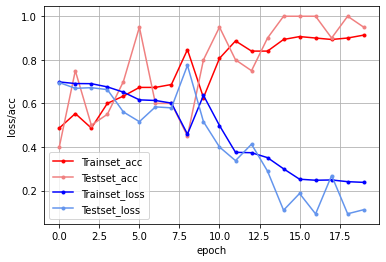

In [12]:
# 결과 그래프로 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='r', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_loss, marker='.', c='b', label='Trainset_loss')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()